<a href="https://colab.research.google.com/github/DavidAlzateOcampo/DataScienceNetwork/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest with Scikit Learn

The current notebook has a purpose to give a brief explanation for random forest solution and how to use it with scikit learn library

## Loading libraries

In [0]:
# Load the libraries needed 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
# Set random seed
np.random.seed(0)

After loading the libraries used in this notebook. It will be assigned the data sets to local variables. 


## Data Wrangling & Exploration


In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print('The shape of iris dataset is :', df.shape)


The shape of iris dataset is : (150, 5)


In [0]:
df.columns
df.columns = ['sepal_length_cm','sepal_width_cm'
             ,'petal_length_cm','petal_width_cm'
             ,'species']

Rename columns to have an easier access to data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [8]:

df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Divide Data by Category

In [10]:
setosa      = df[df['species']=='setosa']
versicolor  = df[df['species']=='versicolor']
virginica   = df[df['species']=='virginica']
print("Division of categories is : ", df.groupby('species').size())

Division of categories is :  species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [11]:
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [12]:
versicolor.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [13]:
virginica.describe()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


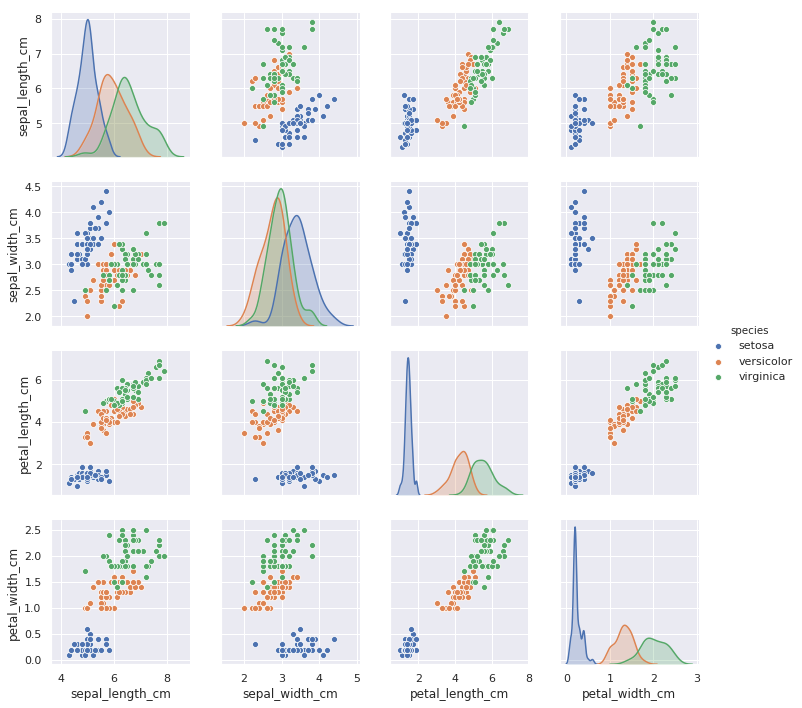

In [14]:
sns.set()
sns.pairplot(df[['sepal_length_cm','sepal_width_cm'
                ,'petal_length_cm', 'petal_width_cm', 'species']]
                ,hue="species", diag_kind="kde")

## Training Data

In [0]:
X=df.iloc[:,0:4] # Features
y=df['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### Simple training

In [17]:
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
#            max_depth=None, max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)
predRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
predRF.fit(X_train,y_train)
y_pred=predRF.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


In [18]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



No handles with labels found to put in legend.


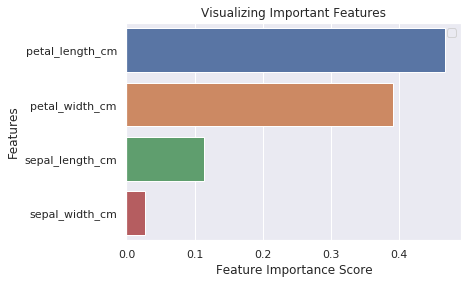

In [20]:
feature_imp = pd.Series(predRF.feature_importances_
                      ,index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

DO NOT running during presentation. 

In [32]:
len(predRF.estimators_)
treeFilenma = ""
j = 1
for estimator in predRF.estimators_:
  treeFilename = "/content/RFTrees/tree" + str(j) + ".png"
  export_graphviz(estimator, out_file='/content/RFTrees/tree.dot'
                ,feature_names = iris.feature_names
                ,class_names = iris.target_names
                ,rounded = True
                ,proportion = False
                ,precision = 2
                ,filled = True)
  # Convert to png using system command (requires Graphviz)
  from subprocess import call
  call(['dot', '-Tpng', '/content/RFTrees/tree.dot', '-o', treeFilename, '-Gdpi=100'])
  print("\n Created filename ",treeFilename)
  j = j + 1

  

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')


 Created filename  /content/RFTrees/tree1.png

 Created filename  /content/RFTrees/tree2.png

 Created filename  /content/RFTrees/tree3.png

 Created filename  /content/RFTrees/tree4.png

 Created filename  /content/RFTrees/tree5.png

 Created filename  /content/RFTrees/tree6.png

 Created filename  /content/RFTrees/tree7.png

 Created filename  /content/RFTrees/tree8.png

 Created filename  /content/RFTrees/tree9.png

 Created filename  /content/RFTrees/tree10.png

 Created filename  /content/RFTrees/tree11.png

 Created filename  /content/RFTrees/tree12.png

 Created filename  /content/RFTrees/tree13.png

 Created filename  /content/RFTrees/tree14.png

 Created filename  /content/RFTrees/tree15.png

 Created filename  /content/RFTrees/tree16.png

 Created filename  /content/RFTrees/tree17.png

 Created filename  /content/RFTrees/tree18.png

 Created filename  /content/RFTrees/tree19.png

 Created filename  /content/RFTrees/tree20.png

 Created filename  /content/RFTrees/tree21.png



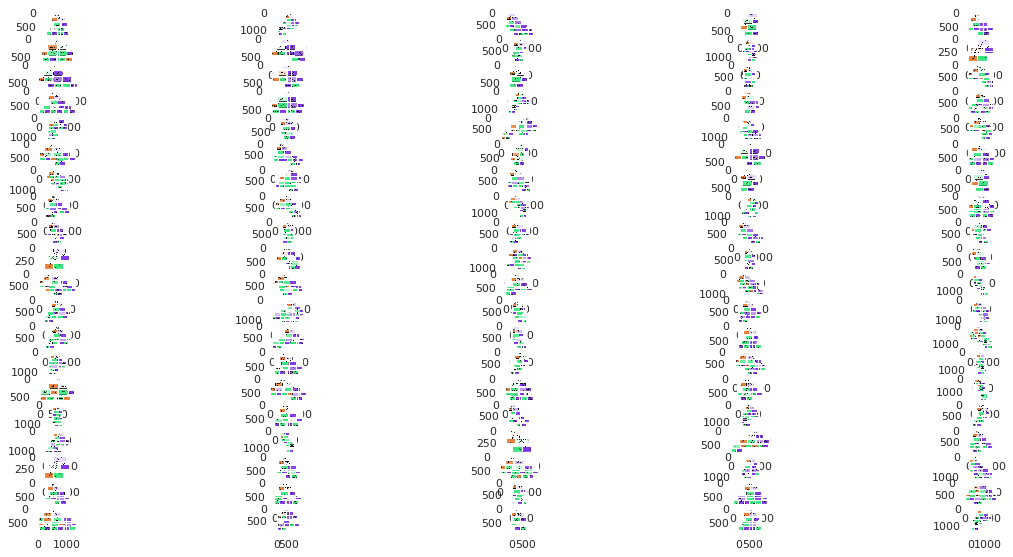

In [34]:
images = []
for img_path in glob.glob('/content/RFTrees/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)